# Risk Aversion

We load a few modules...

In [0]:
import numpy as np
from matplotlib import pyplot as plt

## Utility function

We will user the CRRA utility function: 
$$ u(c) = \frac{c^{1-\sigma}-1}{1-\sigma} $$

In [0]:
def crra(c,sigma):
    if sigma==1.0:
        return np.log(c)
    else :
        return (c**(1-sigma)-1.0)/(1.0-sigma)



We will also create the inverse:

In [0]:
def invcrra(u,gamma):
    if sigma==1.0:
        return np.exp(w)
    else :
        return (u*(1.0-gamma)+1.0)**(1.0/(1.0-gamma))



Let's look how this function behaves...

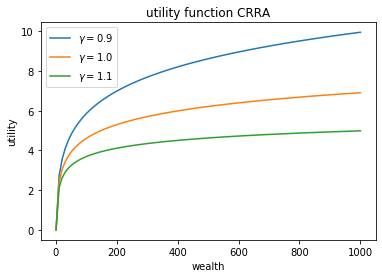

In [6]:
ws = np.linspace(1,1e3,100)
gammas = [0.9,1.0,1.1]
plt.figure()
for gamma in gammas:
    plt.plot(ws,crra(ws,gamma),label='$\\gamma=$'+str(gamma))
plt.xlabel('wealth')
plt.ylabel('utility')
plt.title('utility function CRRA')
plt.legend()
plt.show()


## Managing Risk

In [0]:
from scipy.stats import norm, lognorm, chi2

In [8]:
dir(norm)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_argcheck',
 '_argcheck_rvs',
 '_cdf',
 '_cdf_single',
 '_cdfvec',
 '_construct_argparser',
 '_construct_default_doc',
 '_construct_doc',
 '_ctor_param',
 '_entropy',
 '_fit_loc_scale_support',
 '_fitstart',
 '_get_support',
 '_isf',
 '_logcdf',
 '_logpdf',
 '_logsf',
 '_mom0_sc',
 '_mom1_sc',
 '_mom_integ0',
 '_mom_integ1',
 '_munp',
 '_nnlf',
 '_nnlf_and_penalty',
 '_open_support_mask',
 '_parse_args',
 '_parse_args_rvs',
 '_parse_args_stats',
 '_pdf',
 '_penalized_nnlf',
 '_ppf',
 '_ppf_single',
 '_ppf_to_solve',
 '_ppfvec',
 '_random_state',
 '_reduce_func',
 '_rvs',
 '_

### Random draws

(array([ 17.,  50., 108., 184., 222., 172., 136.,  77.,  28.,   6.]),
 array([-2.53008072, -1.98167238, -1.43326404, -0.88485571, -0.33644737,
         0.21196097,  0.76036931,  1.30877764,  1.85718598,  2.40559432,
         2.95400265]),
 <a list of 10 Patch objects>)

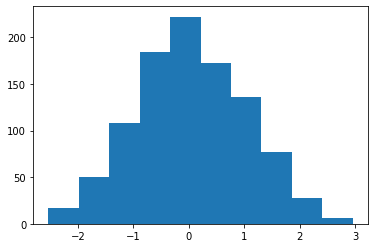

In [9]:
x = norm(0,1).rvs(1000)
plt.hist(x)

### distribution functions (cdf) and density  (pdf)

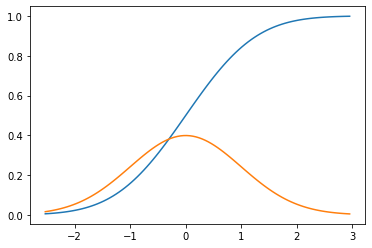

In [10]:
x = np.linspace(np.min(x),np.max(x),100)
plt.figure()
plt.plot(x,norm(0,1).cdf(x))
plt.plot(x,norm(0,1).pdf(x))
plt.show()

### inverse distribution function

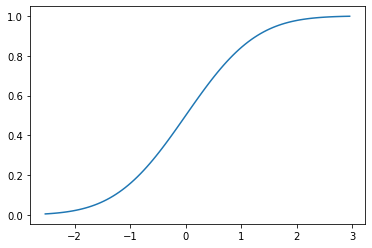

In [11]:
p = norm(0,1).cdf(x)
plt.figure()
plt.plot(norm(0,1).ppf(p),p)
plt.show()

## Stricly positive distributions

In [0]:
mu = 1000.0
sig = 300.0

In [0]:
def loss(mu,sig,S):
    draws = np.exp(norm(np.log(mu),(1/np.sqrt(sig))*np.log(sig)).rvs(S))
    return  draws - 0.5*((1/np.sqrt(sig))*np.log(sig))**2

In [0]:
L = loss(mu,sig,10000)

In [15]:
L

array([1124.35027867,  801.83010706,  811.65410472, ..., 1079.83340643,
       1308.32025674, 1088.82787109])

In [16]:
np.mean(L),np.std(L)

(1055.2564672723609, 357.46658015565987)

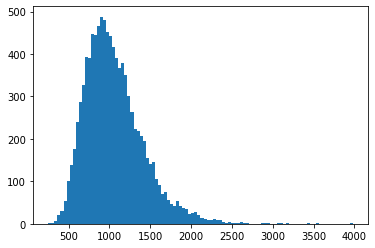

In [17]:
plt.figure()
plt.hist(L,bins=100)
plt.show()

### Expected utility (using simulations)

In [27]:
S = 10000
sig = 1000
eps = norm(0,sig).rvs(S)
wealth = 50e3
eu = np.mean([crra(wealth+e,gamma) for e in eps])
eu

6.6107633132519315

In [0]:
def eucrra(wealth,gamma,eps):
    return np.mean([crra(wealth+e,gamma) for e in eps])

In [23]:
eucrra(wealth,gamma,eps)

6.610676777196231

## Willingness to pay to eliminate risk (risk premium)

We can find the risk premium $\pi$ such that : 
$$ u(w-\pi) - Eu(w+\epsilon) = 0$$

We use bisection to find the solution

In [0]:
def solve(pi,wealth,gamma,eps):
    u = crra(wealth-pi,gamma)
    eu = eucrra(wealth,gamma,eps)
    return eu-u 

In [29]:
from scipy.optimize import bisect
S = 100000
sig = 1000.0
eps = norm(0,1).rvs(S)
wealth = 20e3
bisect(solve, 1.0, 0.95*wealth,args=(wealth,gamma,sig*eps))


27.177028249820495

The consumer is willing to pay this in order to avoid the risk altogether...

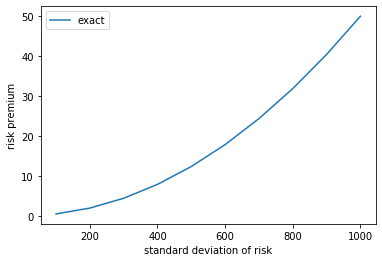

In [30]:
pis = []
sigs = np.linspace(100.0,1000.0,10)
gamma = 2.0
for sig in sigs:
    pis.append(bisect(solve, 0.0, wealth*0.95, args=(wealth,gamma,sig*eps)))
plt.figure()
plt.plot(sigs,pis,label='exact')
plt.xlabel('standard deviation of risk')
plt.ylabel('risk premium')
plt.legend()

## Exemple: Willingness to pay for a car insurance

In [0]:
from scipy.stats import norm,uniform,lognorm

Assume a car has a value of 50,000\$. Your insurance company is offering a policy with a deductible of 500\$ for a premium of 400\$. Your probability of an accident is 5/100. If there is an accident, the repair cost is log normally distributed with average 5000\$ and a standard deviation of 5000\$. 
 

Let's first analyze the risk. What is the expected loss?

In [0]:

wealth = 50e3
mu = 5e3
sig = 0.75
p = 0.05
S = 100000

s = sig 
scale = mu
Lc = lognorm(loc=np.log(mu),scale=scale,s=s).rvs(S)
Lc = np.where(Lc>wealth,wealth*0.99,Lc)
u = uniform(0,1).rvs(S)
eps = np.where(u<p,1.0,0.0)
L = np.multiply(Lc,eps)

In [34]:
np.mean(Lc),np.std(Lc),np.max(Lc)

(6607.91439049872, 5580.249315173755, 49725.12987289419)

In [36]:
np.mean(L),np.std(L),np.max(L)

(334.97600930952376, 1898.075933817384, 49500.0)

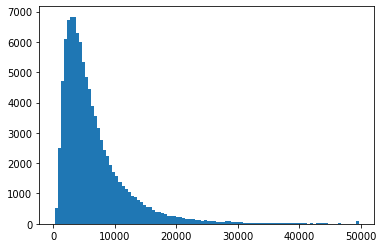

In [37]:
plt.figure()
plt.hist(Lc,bins=100)
plt.show()

So this risk implies an average loss of 327  with a standard deviation of 1879. The coverage offered by the insurer has a deductible. So the insurer pays out $I = \max(L-d,0)$ where $d$ is the deductible. 

In [39]:
d = 500.0
prime = 400.0
I = np.where((L - d)>0,L-d,0.0)
np.mean(I)

309.7243623488241

In [40]:
I

array([0., 0., 0., ..., 0., 0., 0.])

The insurer is selling the policy for 400 while the zero-profit premium would be roughly 300. So he is making a profit on that insurance. Do you purchase it? It will depend on risk aversion.

We compute his willingness to pay

In [0]:
def solve(wtp,wealth,gamma,L,I):
    eu_n = eucrra(wealth,gamma,-L)
    eu_i = eucrra(wealth-wtp,gamma,-L+I)
    return eu_i-eu_n

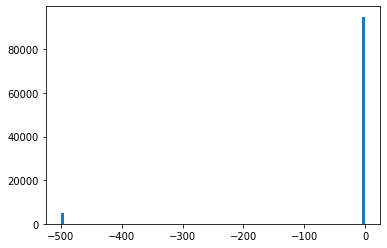

In [49]:
plt.figure()
plt.hist(-L+I,bins=100)

plt.show()

In [42]:
solve(0.0,wealth,gamma,L,I)

2.553021398732369e-07

In [43]:
gamma = 1.5
bisect(solve, 0.0, 1000.0,args=(wealth,gamma,L,I))

425.4281952235033

You are willing to pay more than the premium. So you purchase it. 

We can do it for various values of risk aversion:

In [0]:
gammas = np.linspace(0.5,2.0,10)
wtps = []
for gamma in gammas:
    opt = bisect(solve, 0.0, 1000.0,args=(wealth,gamma,L,I))
    wtps.append(opt)

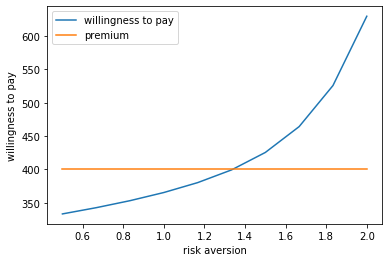

In [51]:
plt.figure()
plt.plot(gammas,wtps,label='willingness to pay')
plt.plot(gammas,prime*np.ones(len(gammas)),label='premium')
plt.xlabel('risk aversion')
plt.ylabel('willingness to pay')
plt.legend()
plt.show()

An individual with a low risk aversion should not purchase. We could use a framework like this to study complex insurance products.